# Terapixel Dataset: Exploratory Data Analysis

The objective of this report is to evaluate the performance of Terapixel rendering in cloud super computing. The motive is to address the issue of how to deliver the supercomputer scale resources needed to compute a realistic terapixel visualization of the city of Newcastle upon Tyne and its environmental data as captured by the Newcastle Urban Observatory. We’re provided with different processes and their time stamps, GPU details, and task details. We’ll further analyse these datasets in order to assess speed and accuracy of the super computing, we’ll try to know more about the processes involved and their impact on different GPUs.
3 data files: Application checkpoint, GPU and task are loaded

Three datasets are provided here, this data was produced using inputs from system metrics and application checkpoints during the creation of terapixel.

In [138]:
import pandas as pd
checkpoint = pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/application-checkpoints.csv")
gpu=pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/gpu.csv")
task=pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/task-x-y.csv")

In [139]:
!pip install -U pandasql

In [140]:
#libraries
from sklearn import datasets
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [251]:
checkpoint.head().sort_values(by=['timestamp'])

timestamp                                hostname  \
0  2018-11-08T07:41:55.921Z  0d56a730076643d585f77e00d2d8521a00000N   
1  2018-11-08T07:42:29.842Z  0d56a730076643d585f77e00d2d8521a00000N   
2  2018-11-08T07:42:29.845Z  0d56a730076643d585f77e00d2d8521a00000N   
3  2018-11-08T07:42:29.845Z  0d56a730076643d585f77e00d2d8521a00000N   
4  2018-11-08T07:43:13.957Z  0d56a730076643d585f77e00d2d8521a00000N   

       eventName eventType                                            jobId  \
0         Tiling      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1  Saving Config     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2  Saving Config      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3         Render     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
4    TotalRender      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId  
0  b47f0263-ba1c-48a7-8d29-4bf021b72043  
1  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
2  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
3  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
4  20fb9fcf-a927-4a4b-a64c-70258b66b42d

#### Application checkpoint 
It is saved as checkpoint, q_start_stop is created as a self join to extract rows which contain information about when an event started and stopped,later time taken by each task is calculated and added as a column. The join is based on taskID.

In [143]:
q_start_stop='select a.hostname,a.taskId, a.jobId, a.eventName,a.eventType as Start,a.timestamp as Start_Time,b.eventType as Stop,b.timestamp as Stop_Time from checkpoint a INNER JOIN checkpoint b on a.taskId=b.taskId and a.eventName=b.eventName where a.timestamp<b.timestamp order by a.eventName;'
q_start_stop=pysqldf(q_start_stop)
q_start_stop.head()

hostname  \
0  0d56a730076643d585f77e00d2d8521a00000N   
1  0d56a730076643d585f77e00d2d8521a00000N   
2  0d56a730076643d585f77e00d2d8521a00000N   
3  0d56a730076643d585f77e00d2d8521a00000N   
4  0d56a730076643d585f77e00d2d8521a00000N   

                                 taskId  \
0  20fb9fcf-a927-4a4b-a64c-70258b66b42d   
1  e7776af5-510d-4ec4-b2d3-222b5df3307b   
2  339d3724-dcf6-41f1-b30d-c71107befcee   
3  8d663dcb-7a8c-42e9-93de-21d0e6a508f5   
4  244fd4f0-104e-4512-93b4-d9f83e2d0d9c   

                                             jobId eventName  Start  \
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
2  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
3  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
4  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   

                 Start_Time  Stop                 Stop_Time  
0  2018-11-08T07:42:29.845Z  STOP  2018-11-08T07:43:10.965Z  
1  2018-11-08T08:14:53.364Z  STOP  2018-11-08T08:15:32.380Z  
2  2018-11-08T08:21:58.845Z  STOP  2018-11-08T08:22:38.257Z  
3  2018-11-08T07:48:06.922Z  STOP  2018-11-08T07:48:47.993Z  
4  2018-11-08T07:59:32.698Z  STOP  2018-11-08T08:00:11.667Z

In [252]:
#Changing data format
q_start_stop["Start_Time"]=q_start_stop["Start_Time"].astype('datetime64')
q_start_stop["Stop_Time"]=q_start_stop["Stop_Time"].astype('datetime64')
q_start_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332670 entries, 0 to 332669
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   hostname    332670 non-null  object        
 1   taskId      332670 non-null  object        
 2   jobId       332670 non-null  object        
 3   eventName   332670 non-null  object        
 4   Start       332670 non-null  object        
 5   Start_Time  332670 non-null  datetime64[ns]
 6   Stop        332670 non-null  object        
 7   Stop_Time   332670 non-null  datetime64[ns]
 8   Time_taken  332670 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 22.8+ MB


In [255]:
#Adding the Time taken column
q_start_stop['Time_taken']=(q_start_stop['Stop_Time']-q_start_stop['Start_Time']).dt.total_seconds()
q_start_stop

hostname  \
0       0d56a730076643d585f77e00d2d8521a00000N   
1       0d56a730076643d585f77e00d2d8521a00000N   
2       0d56a730076643d585f77e00d2d8521a00000N   
3       0d56a730076643d585f77e00d2d8521a00000N   
4       0d56a730076643d585f77e00d2d8521a00000N   
...                                        ...   
332665  265232c5f6814768aeefa66a7bec6ff6000019   
332666  0745914f4de046078517041d70b22fe7000017   
332667  04dc4e9647154250beeee51b866b0715000018   
332668  b9a1fa7ae2f74eb68f25f607980f97d7000005   
332669  0d56a730076643d585f77e00d2d8521a00000D   

                                      taskId  \
0       20fb9fcf-a927-4a4b-a64c-70258b66b42d   
1       e7776af5-510d-4ec4-b2d3-222b5df3307b   
2       339d3724-dcf6-41f1-b30d-c71107befcee   
3       8d663dcb-7a8c-42e9-93de-21d0e6a508f5   
4       244fd4f0-104e-4512-93b4-d9f83e2d0d9c   
...                                      ...   
332665  8d236089-ade1-4dc8-81c9-5d0a7a84962f   
332666  46f6a589-a0ff-4e6a-a783-48fac52394ff   
332667  d9e30dd2-b0a5-461c-8bc4-f33030825a2f   
332668  120e5f6f-67a7-4973-b431-026f1a68400c   
332669  423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6   

                                                  jobId  eventName  Start  \
0       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705     Render  START   
1       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705     Render  START   
2       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705     Render  START   
3       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705     Render  START   
4       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705     Render  START   
...                                                 ...        ...    ...   
332665  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Uploading  START   
332666  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Uploading  START   
332667  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Uploading  START   
332668  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Uploading  START   
332669  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Uploading  START   

                    Start_Time  Stop               Stop_Time  Time_taken  
0      2018-11-08 07:42:29.845  STOP 2018-11-08 07:43:10.965      41.120  
1      2018-11-08 08:14:53.364  STOP 2018-11-08 08:15:32.380      39.016  
2      2018-11-08 08:21:58.845  STOP 2018-11-08 08:22:38.257      39.412  
3      2018-11-08 07:48:06.922  STOP 2018-11-08 07:48:47.993      41.071  
4      2018-11-08 07:59:32.698  STOP 2018-11-08 08:00:11.667      38.969  
...                        ...   ...                     ...         ...  
332665 2018-11-08 08:30:09.748  STOP 2018-11-08 08:30:10.667       0.919  
332666 2018-11-08 08:30:06.966  STOP 2018-11-08 08:30:08.110       1.144  
332667 2018-11-08 08:30:07.303  STOP 2018-11-08 08:30:08.300       0.997  
332668 2018-11-08 08:30:11.174  STOP 2018-11-08 08:30:12.074       0.900  
332669 2018-11-08 08:30:09.642  STOP 2018-11-08 08:30:10.614       0.972  

[332670 rows x 9 columns]

In [254]:
q_start_stop[q_start_stop['eventName']=='Saving Config']
#Saving_config takes insignificant time to complete

hostname  \
66534   0d56a730076643d585f77e00d2d8521a00000N   
66535   0d56a730076643d585f77e00d2d8521a00000N   
66536   0d56a730076643d585f77e00d2d8521a00000N   
66537   0d56a730076643d585f77e00d2d8521a00000N   
66538   0d56a730076643d585f77e00d2d8521a00000N   
...                                        ...   
133063  b9a1fa7ae2f74eb68f25f607980f97d700000V   
133064  04dc4e9647154250beeee51b866b071500000G   
133065  0d56a730076643d585f77e00d2d8521a00000X   
133066  0745914f4de046078517041d70b22fe700000I   
133067  0d56a730076643d585f77e00d2d8521a00001B   

                                      taskId  \
66534   20fb9fcf-a927-4a4b-a64c-70258b66b42d   
66535   c9e249d8-52ed-40c6-8713-b5cbf02ea87e   
66536   fb8b9faa-be63-426c-9742-be30e5298f5b   
66537   674ef19f-b3cb-4aa5-8980-f37cbbca324d   
66538   a3f07861-f633-4c6d-9c12-7fa9a2610524   
...                                      ...   
133063  b8f12d97-bfcd-4724-b617-b15db8192e42   
133064  a86081e9-57a0-44f6-8694-5a5a8b9fedc1   
133065  4b87d4d9-16a2-4331-b73c-b444eb5415d4   
133066  8261c0ff-03d6-48b3-a50f-da41cb3291fd   
133067  8cd9ae78-e712-4313-81a6-6e509514109b   

                                                  jobId      eventName  Start  \
66534   1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
66535   1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
66536   1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
66537   1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
66538   1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
...                                                 ...            ...    ...   
133063  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
133064  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
133065  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
133066  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   
133067  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  Saving Config  START   

                    Start_Time  Stop               Stop_Time  Time_taken  
66534  2018-11-08 07:42:29.842  STOP 2018-11-08 07:42:29.845       0.003  
66535  2018-11-08 07:44:47.555  STOP 2018-11-08 07:44:47.557       0.002  
66536  2018-11-08 08:03:09.698  STOP 2018-11-08 08:03:09.701       0.003  
66537  2018-11-08 08:03:46.513  STOP 2018-11-08 08:03:46.515       0.002  
66538  2018-11-08 08:17:45.406  STOP 2018-11-08 08:17:45.408       0.002  
...                        ...   ...                     ...         ...  
133063 2018-11-08 08:29:23.079  STOP 2018-11-08 08:29:23.082       0.003  
133064 2018-11-08 08:29:21.018  STOP 2018-11-08 08:29:21.020       0.002  
133065 2018-11-08 08:29:23.052  STOP 2018-11-08 08:29:23.055       0.003  
133066 2018-11-08 08:29:23.079  STOP 2018-11-08 08:29:23.081       0.002  
133067 2018-11-08 08:29:23.079  STOP 2018-11-08 08:29:23.081       0.002  

[66534 rows x 9 columns]

### Exploratory Data analysis
* We'll try to answer few questions using the given dataset, like
* What is the time taken by different event?
* Which events take more time and which takes the least?
* If there any relationship among different GPU metrics?
* Which GPUs draw most power on average?
* Which GPUs take more time in completing the events?


Now that each event is separated along with its time taken, average time taken by each event is calculated and plotted:

In [147]:
q_avg_time_taken="select eventName,AVG(Time_Taken) from q_start_stop where eventName not like '%TotalRender%' group by eventName;"
q_avg_time_taken=pysqldf(q_avg_time_taken)
q_avg_time_taken

eventName  AVG(Time_Taken)
0         Render        41.227902
1  Saving Config         0.002476
2         Tiling         0.973204
3      Uploading         1.393523

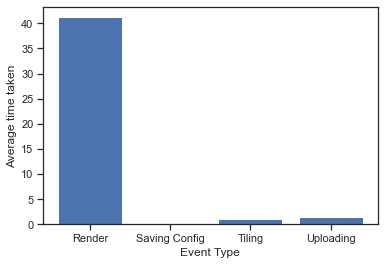

In [148]:
#Average time V/s Events
import matplotlib.pyplot as plt
plt.bar(q_avg_time_taken['eventName'],q_avg_time_taken['AVG(Time_Taken)'])
plt.xlabel("Event Type")
plt.ylabel("Average time taken")
plt.show()

From above plot, it is clearly that Render takes significantly high time as compared to other events.

#### GPU: Finding relationship between temperature and GPU performance metrics

In [257]:
gpu.sort_values(by=['hostname'])

timestamp                                hostname  \
706276  2018-11-08 08:14:40.694  04dc4e9647154250beeee51b866b0715000000   
417017  2018-11-08 07:45:11.221  04dc4e9647154250beeee51b866b0715000000   
1215332 2018-11-08 08:11:59.273  04dc4e9647154250beeee51b866b0715000000   
406575  2018-11-08 07:43:30.338  04dc4e9647154250beeee51b866b0715000000   
1016041 2018-11-08 08:00:59.520  04dc4e9647154250beeee51b866b0715000000   
...                         ...                                     ...   
1295145 2018-11-08 07:47:10.580  e7adc42d28814e518e9601ac2329c51300001D   
195314  2018-11-08 08:00:55.686  e7adc42d28814e518e9601ac2329c51300001D   
491935  2018-11-08 08:00:01.225  e7adc42d28814e518e9601ac2329c51300001D   
1000896 2018-11-08 07:42:30.193  e7adc42d28814e518e9601ac2329c51300001D   
118048  2018-11-08 08:26:16.718  e7adc42d28814e518e9601ac2329c51300001D   

            gpuSerial                                   gpuUUID  \
706276   323217056165  GPU-a1119ee9-9cd1-919f-a479-b902142c717d   
417017   323217056165  GPU-a1119ee9-9cd1-919f-a479-b902142c717d   
1215332  323217056165  GPU-a1119ee9-9cd1-919f-a479-b902142c717d   
406575   323217056165  GPU-a1119ee9-9cd1-919f-a479-b902142c717d   
1016041  323217056165  GPU-a1119ee9-9cd1-919f-a479-b902142c717d   
...               ...                                       ...   
1295145  320118119027  GPU-0cee5a9f-749e-7780-791a-ff2b29590a38   
195314   320118119027  GPU-0cee5a9f-749e-7780-791a-ff2b29590a38   
491935   320118119027  GPU-0cee5a9f-749e-7780-791a-ff2b29590a38   
1000896  320118119027  GPU-0cee5a9f-749e-7780-791a-ff2b29590a38   
118048   320118119027  GPU-0cee5a9f-749e-7780-791a-ff2b29590a38   

         powerDrawWatt  gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
706276           77.56        45           94              60  
417017           89.90        44           89              54  
1215332         110.85        46           91              49  
406575          144.42        45           89              44  
1016041         131.93        44           92              53  
...                ...       ...          ...             ...  
1295145         111.33        41           88              58  
195314           43.39        36            7               0  
491935          155.29        43           94              62  
1000896          26.51        33            0               0  
118048          135.27        40           93              60  

[1543681 rows x 8 columns]

In [150]:
gpu['hostname'].value_counts()

4a79b6d2616049edbf06c6aa58ab426a00000Y    3002
4ad946d4435c42dabb5073531ea4f315000001    3002
35bd84d72aca403b8129a7d652cc2750000005    3002
0745914f4de046078517041d70b22fe7000005    3002
95b4ae6d890e4c46986d91d7ac4bf082000010    2992
                                          ... 
0d56a730076643d585f77e00d2d8521a00000I    1492
0d56a730076643d585f77e00d2d8521a00000F    1492
0d56a730076643d585f77e00d2d8521a00000N    1492
0d56a730076643d585f77e00d2d8521a00000S    1491
0d56a730076643d585f77e00d2d8521a000012    1489
Name: hostname, Length: 1024, dtype: int64

From above, we can conclude the GPU has 15,43,681 records, and for each hostname, there are multiple entries about their temperature, power drawn, GPU utilization percentage, memory utilization percentage at different time intervals.

##### Finding relationship between GPU temperature & other GPU performance metrics

In [25]:
# Power drawn v/s Temperature
plt.rcParams['figure.figsize'] = [10, 6]
sns.lmplot(x="powerDrawWatt",y="gpuTempC", data=gpu)
plt.show()

The above plot do not clearly forms a relation but gives a vague linear proportional relation between power drawn and temperature

##### Pairplot for Performance metrics and Temperature

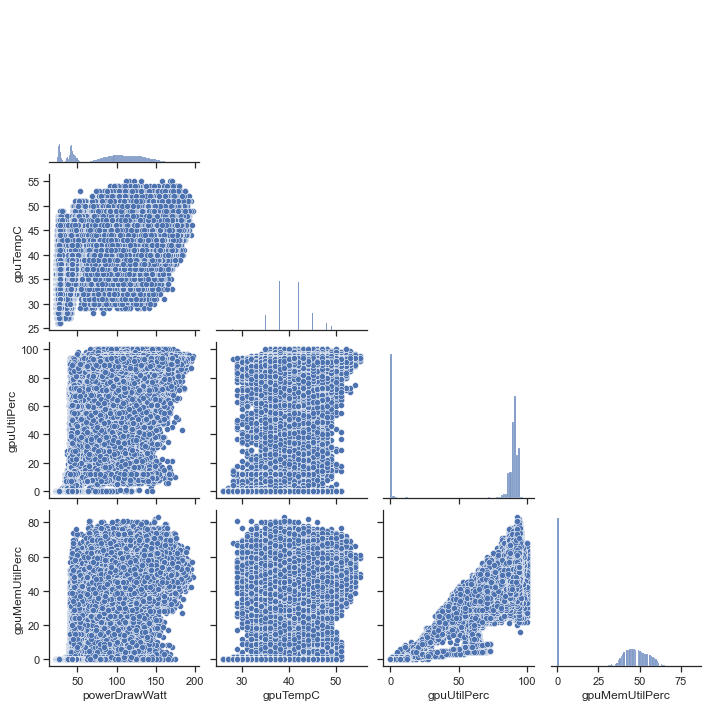

In [62]:
sns.pairplot(
    gpu,
    x_vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"],
    y_vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"],corner=True
)
plt.show()

This graph clearly highlight an approx. direct relationship between GPU memory utilization percentage and GPU utilization percentage.

#### Analyzing GPU and q_start_stop(refined application checkpoint data)

In [60]:
gpu['hostname'].shape# 1,024 hostnames; 15,43,681 records

(1543681,)

In [27]:
q_start_stop.head()

hostname  \
0  0d56a730076643d585f77e00d2d8521a00000N   
1  0d56a730076643d585f77e00d2d8521a00000N   
2  0d56a730076643d585f77e00d2d8521a00000N   
3  0d56a730076643d585f77e00d2d8521a00000N   
4  0d56a730076643d585f77e00d2d8521a00000N   

                                 taskId  \
0  20fb9fcf-a927-4a4b-a64c-70258b66b42d   
1  e7776af5-510d-4ec4-b2d3-222b5df3307b   
2  339d3724-dcf6-41f1-b30d-c71107befcee   
3  8d663dcb-7a8c-42e9-93de-21d0e6a508f5   
4  244fd4f0-104e-4512-93b4-d9f83e2d0d9c   

                                             jobId eventName  Start  \
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
2  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
3  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   
4  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705    Render  START   

               Start_Time  Stop               Stop_Time  Time_taken  
0 2018-11-08 07:42:29.845  STOP 2018-11-08 07:43:10.965      41.120  
1 2018-11-08 08:14:53.364  STOP 2018-11-08 08:15:32.380      39.016  
2 2018-11-08 08:21:58.845  STOP 2018-11-08 08:22:38.257      39.412  
3 2018-11-08 07:48:06.922  STOP 2018-11-08 07:48:47.993      41.071  
4 2018-11-08 07:59:32.698  STOP 2018-11-08 08:00:11.667      38.969

In [151]:
gpu["timestamp"]=gpu["timestamp"].astype('datetime64')

In [66]:
gpu.head()

timestamp                                hostname  \
0 2018-11-08 08:27:10.314  8b6a0eebc87b4cb2b0539e81075191b900001C   
1 2018-11-08 08:27:10.192  d8241877cd994572b46c861e5d144c85000000   
2 2018-11-08 08:27:10.842  db871cd77a544e13bc791a64a0c8ed50000006   
3 2018-11-08 08:27:10.424  b9a1fa7ae2f74eb68f25f607980f97d7000010   
4 2018-11-08 08:27:10.937  db871cd77a544e13bc791a64a0c8ed50000003   

      gpuSerial                                   gpuUUID  powerDrawWatt  \
0  323217055910  GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534         131.55   
1  323617020295  GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f         117.03   
2  323217056562  GPU-f4597939-a0b4-e78a-2436-12dbab9a350f         121.64   
3  325217085931  GPU-ad773c69-c386-a4be-b214-1ea4fc6045df          50.23   
4  323217056464  GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2         141.82   

   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0        48           92              53  
1        40           92              48  
2        45           91              44  
3        38           90              43  
4        41           90              47

In [84]:
q_start_stop['hostname'].value_counts().head(20) #1024 hostnames

0d56a730076643d585f77e00d2d8521a000000    1240
b9a1fa7ae2f74eb68f25f607980f97d7000009    1240
0d56a730076643d585f77e00d2d8521a00000P    1240
b9a1fa7ae2f74eb68f25f607980f97d700000Y    1220
8b6a0eebc87b4cb2b0539e81075191b900000D     355
35bd84d72aca403b8129a7d652cc275000000N     350
d8241877cd994572b46c861e5d144c8500001C     350
265232c5f6814768aeefa66a7bec6ff600000W     350
dcc19f48bb3445a28338db3a8f002e9c00000O     350
a77ef58b13ad4c01b769dac8409af3f8000015     350
a77ef58b13ad4c01b769dac8409af3f8000018     345
b9a1fa7ae2f74eb68f25f607980f97d7000008     345
a77ef58b13ad4c01b769dac8409af3f8000014     345
0d56a730076643d585f77e00d2d8521a00001C     345
0745914f4de046078517041d70b22fe700000H     345
d8241877cd994572b46c861e5d144c85000004     345
0d56a730076643d585f77e00d2d8521a00000Z     345
0745914f4de046078517041d70b22fe7000014     345
35bd84d72aca403b8129a7d652cc2750000000     345
cd44f5819eba427a816e7ce648adceb200000Z     345
Name: hostname, dtype: int64

In [79]:
(gpu['hostname'].value_counts()).head(20) # 1024 hostnames

4ad946d4435c42dabb5073531ea4f315000001    3002
0745914f4de046078517041d70b22fe7000005    3002
35bd84d72aca403b8129a7d652cc2750000005    3002
4a79b6d2616049edbf06c6aa58ab426a00000Y    3002
95b4ae6d890e4c46986d91d7ac4bf082000010    2992
04dc4e9647154250beeee51b866b071500000G    1502
a77ef58b13ad4c01b769dac8409af3f800000G    1502
db871cd77a544e13bc791a64a0c8ed5000000A    1502
a77ef58b13ad4c01b769dac8409af3f800000I    1502
a77ef58b13ad4c01b769dac8409af3f8000018    1502
4a79b6d2616049edbf06c6aa58ab426a000007    1501
e7adc42d28814e518e9601ac2329c51300000X    1501
a77ef58b13ad4c01b769dac8409af3f800000Q    1501
83ea61ac1ef54f27a3bf7bd0f41ecaa700000X    1501
a77ef58b13ad4c01b769dac8409af3f800000A    1501
b9a1fa7ae2f74eb68f25f607980f97d7000006    1501
b9a1fa7ae2f74eb68f25f607980f97d700000M    1501
5903af3699134795af7eafc605ae5fc700000C    1501
265232c5f6814768aeefa66a7bec6ff6000009    1501
0d56a730076643d585f77e00d2d8521a000002    1501
Name: hostname, dtype: int64

In [85]:
q_start_stop[q_start_stop['hostname']=="4ad946d4435c42dabb5073531ea4f315000001"]

hostname  \
55      4ad946d4435c42dabb5073531ea4f315000001   
1089    4ad946d4435c42dabb5073531ea4f315000001   
2460    4ad946d4435c42dabb5073531ea4f315000001   
3260    4ad946d4435c42dabb5073531ea4f315000001   
5354    4ad946d4435c42dabb5073531ea4f315000001   
...                                        ...   
324032  4ad946d4435c42dabb5073531ea4f315000001   
324184  4ad946d4435c42dabb5073531ea4f315000001   
324378  4ad946d4435c42dabb5073531ea4f315000001   
324837  4ad946d4435c42dabb5073531ea4f315000001   
325518  4ad946d4435c42dabb5073531ea4f315000001   

                                      taskId  eventName  Start  \
55      ef4839e2-ebde-4834-ae7c-c8908e2600d7     Render  START   
1089    b73094ce-822a-4ad2-8eec-80d98d95882c     Render  START   
2460    1f6e40dd-d2d0-40d0-bb29-2f9b336f0806     Render  START   
3260    2d5d501f-4534-4e55-b958-d0f02c689a56     Render  START   
5354    20f6cd42-1fb6-47fe-990c-2c842d066ad8     Render  START   
...                                      ...        ...    ...   
324032  170b25ba-7288-431d-b835-8cf242989d7f  Uploading  START   
324184  b63749b4-4462-4c64-b456-ed7123411334  Uploading  START   
324378  0ead2431-3ee5-4bbd-9c16-ba9e89ab779f  Uploading  START   
324837  20f6cd42-1fb6-47fe-990c-2c842d066ad8  Uploading  START   
325518  f9f306b9-97ac-40c2-b0ce-1578b8f7f43c  Uploading  START   

                    Start_Time  Stop               Stop_Time  Time_taken  
55     2018-11-08 07:41:31.206  STOP 2018-11-08 07:42:16.958      45.752  
1089   2018-11-08 07:53:47.398  STOP 2018-11-08 07:54:36.071      48.673  
2460   2018-11-08 07:58:47.872  STOP 2018-11-08 07:59:34.617      46.745  
3260   2018-11-08 08:01:44.106  STOP 2018-11-08 08:02:27.117      43.011  
5354   2018-11-08 07:50:19.442  STOP 2018-11-08 07:51:04.290      44.848  
...                        ...   ...                     ...         ...  
324032 2018-11-08 07:48:03.775  STOP 2018-11-08 07:48:04.792       1.017  
324184 2018-11-08 07:48:45.125  STOP 2018-11-08 07:48:46.048       0.923  
324378 2018-11-08 07:49:24.201  STOP 2018-11-08 07:49:25.327       1.126  
324837 2018-11-08 07:51:04.290  STOP 2018-11-08 07:51:05.233       0.943  
325518 2018-11-08 08:03:57.930  STOP 2018-11-08 08:03:58.949       1.019  

[315 rows x 8 columns]

GPU and q_start_stop, both files have 1024 hostname entries and both have multiple entries for each hostname. Merging these 2 datafiles would create a very large datafile which can be difficult to handle. Hence, first we can take one hostname at a time and find a relation:

In [261]:
ss_gpu_totalrender2="select gpu.*,ss.eventName,ss.Time_taken from q_start_stop ss INNER JOIN gpu on ss.hostname=gpu.hostname where ss.eventName='TotalRender' and gpu.hostname='0745914f4de046078517041d70b22fe7000005' and ss.Start_Time<=gpu.timestamp and ss.Stop_Time>=gpu.timestamp;"
ss_gpu_totalrender2=pysqldf(ss_gpu_totalrender2)

g = sns.PairGrid(ss_gpu_totalrender2,vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"], hue="Time_taken")
g.map_diag(sns.kdeplot, hue=None, color="green")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

Above pairplot shows similar relation for total render event for one hostname. It is interesting to note that high time taking total render event clustered around the same place. This pattern is seen in Power drawn Vs. GPU utilisation percentage, power drawn Vs. GPU memory utilisation percentage, and GPU utilisation percentage Vs. GPU memory utilisation percentage.

#### Finding GPUs with top average Power drawn

In [153]:
query="select hostname,AVG(powerDrawWatt) as avg_power from gpu group by hostname;"
query=pysqldf(query)
query

hostname  avg_power
0     04dc4e9647154250beeee51b866b0715000000  95.868947
1     04dc4e9647154250beeee51b866b0715000001  91.813693
2     04dc4e9647154250beeee51b866b0715000002  82.537798
3     04dc4e9647154250beeee51b866b0715000003  86.558581
4     04dc4e9647154250beeee51b866b0715000004  94.292392
...                                      ...        ...
1019  e7adc42d28814e518e9601ac2329c513000019  89.386562
1020  e7adc42d28814e518e9601ac2329c51300001A  82.943504
1021  e7adc42d28814e518e9601ac2329c51300001B  88.354997
1022  e7adc42d28814e518e9601ac2329c51300001C  88.411319
1023  e7adc42d28814e518e9601ac2329c51300001D  97.399313

[1024 rows x 2 columns]

In [154]:
query=query.sort_values(by=['avg_power'],ascending=False).head(10)
query

hostname   avg_power
687  a77ef58b13ad4c01b769dac8409af3f800000D  106.247462
904  db871cd77a544e13bc791a64a0c8ed5000000U  101.974324
37   04dc4e9647154250beeee51b866b0715000011  101.549633
441  5903af3699134795af7eafc605ae5fc700000H   99.057575
616  8b6a0eebc87b4cb2b0539e81075191b9000016   98.698678
44   04dc4e9647154250beeee51b866b0715000018   98.250353
357  4ad946d4435c42dabb5073531ea4f31500000X   98.150566
537  83ea61ac1ef54f27a3bf7bd0f41ecaa700000D   97.795836
412  4c72fae95b9147189a0559269a6953ff000012   97.771817
57   0745914f4de046078517041d70b22fe7000007   97.535805

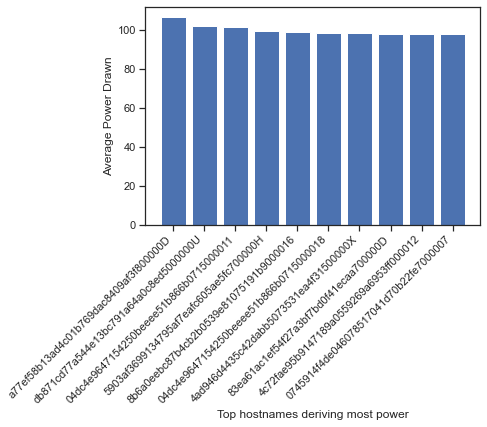

In [155]:
plt.bar(query['hostname'],query['avg_power'])
plt.xlabel("Top hostnames deriving most power")
plt.ylabel("Average Power Drawn")
plt.xticks(rotation=45, ha='right')
plt.show()

These are the top 10 average power drawing CPUs.

#### Merging checkpoint data with GPU data considering the top 10 average power drawing GPUs. 

GPU dataset and application checkpoint dataset are merged based on top 10 power drawing hostname and timestamp to find out average power drawn by each event. Top 10 hostnames are selected since GPU data is itself a very large dataset, and merging it with checkpoint data would create a dataset which is manyfold in size, hence considering any 10 hostnames with a special characteristics ( here, most power drawn) seems like a good evaluation and would create a window to the larger picture.

**Assumption** : Since saving config takes less than a milli second to complete, it can be neglected from the analysis. This is specially because GPU data is recorded for different timestamps, and since saving config completes in fraction of seconds, no GPU data is recorded for saving config. Hence, from now on, we’re considering Render, tiling and uploading, and total render as the total event.


In [228]:
eventVSgpu="select g.*,ss.eventName,ss.Time_taken from q_start_stop ss INNER JOIN gpu g on ss.hostname=g.hostname where ss.hostname IN (select hostname from query) and ss.Start_Time<=g.timestamp and ss.Stop_Time>=g.timestamp;"
eventVSgpu=pysqldf(eventVSgpu)
eventVSgpu

timestamp                                hostname  \
0      2018-11-08 07:41:32.960000  4ad946d4435c42dabb5073531ea4f31500000X   
1      2018-11-08 07:41:34.978000  4ad946d4435c42dabb5073531ea4f31500000X   
2      2018-11-08 07:41:36.995000  4ad946d4435c42dabb5073531ea4f31500000X   
3      2018-11-08 07:41:39.011000  4ad946d4435c42dabb5073531ea4f31500000X   
4      2018-11-08 07:41:41.028000  4ad946d4435c42dabb5073531ea4f31500000X   
...                           ...                                     ...   
27495  2018-11-08 08:16:31.340000  83ea61ac1ef54f27a3bf7bd0f41ecaa700000D   
27496  2018-11-08 08:17:23.416000  4c72fae95b9147189a0559269a6953ff000012   
27497  2018-11-08 08:27:52.110000  db871cd77a544e13bc791a64a0c8ed5000000U   
27498  2018-11-08 08:28:19.013000  4c72fae95b9147189a0559269a6953ff000012   
27499  2018-11-08 08:29:49.812000  4ad946d4435c42dabb5073531ea4f31500000X   

          gpuSerial                                   gpuUUID  powerDrawWatt  \
0      320118119710  GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b          28.64   
1      320118119710  GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b          28.63   
2      320118119710  GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b          42.67   
3      320118119710  GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b         131.96   
4      320118119710  GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b         120.09   
...             ...                                       ...            ...   
27495  323617042624  GPU-3c70c815-37f7-30cd-5aae-028b84687738          54.42   
27496  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2          47.24   
27497  323617021202  GPU-a69f6567-f08c-9c67-06a3-eab81fe834d2          44.38   
27498  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2          53.25   
27499  320118119710  GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b          52.89   

       gpuTempC  gpuUtilPerc  gpuMemUtilPerc  eventName  Time_taken  
0            28            0               0     Render      44.799  
1            28            0               0     Render      44.799  
2            29            0               0     Render      44.799  
3            31           67              41     Render      44.799  
4            33           91              47     Render      44.799  
...         ...          ...             ...        ...         ...  
27495        43            0               0  Uploading       1.185  
27496        46            0               0  Uploading       1.021  
27497        40            0               0  Uploading       1.248  
27498        48            0               0  Uploading       1.075  
27499        39            0               0  Uploading       0.945  

[27500 rows x 10 columns]

It is worth noting that this dataset eventVSgpu has no data about Saveconfig. This could be specially because saveconfig took insignificant amount of time in completing and no entry for any timestamp between that short duration ( in mili seconds) was recorded.

In [229]:
eventVSgpu['eventName'].value_counts()

TotalRender    13603
Render         13184
Uploading        419
Tiling           294
Name: eventName, dtype: int64

#### Different events showing relationship between power drawn and GPU temperature

<AxesSubplot:xlabel='powerDrawWatt', ylabel='gpuTempC'>

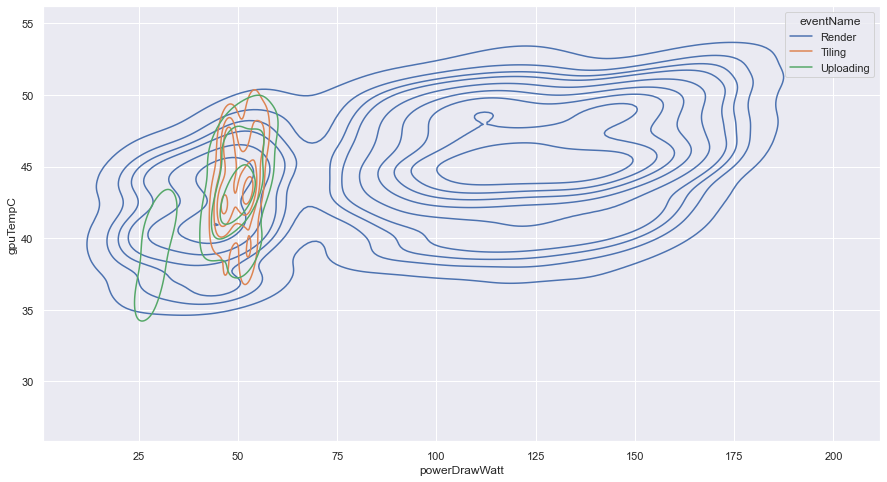

In [234]:
sns.kdeplot(data=eventVSgpu[eventVSgpu['eventName']!="TotalRender"], x="powerDrawWatt", y="gpuTempC",hue="eventName")

This graph depicts that render shows an elaborate and slightly linear relation between power drawn and GPU temperature and these values are higher for only render. Tiling and uploading are confined to smaller space, depicting low power drawn but comparatively higher temperatures.

#### Average Power drawn by each Event

In [235]:
avgpower_eventtime="select AVG(powerDrawWatt),eventName from eventVSgpu where eventName not like '%TotalRender%' group by eventName;"
avgpower_eventtime=pysqldf(avgpower_eventtime)
avgpower_eventtime

AVG(powerDrawWatt)  eventName
0          108.204798     Render
1           50.078061     Tiling
2           45.704105  Uploading

In [236]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(avgpower_eventtime['AVG(powerDrawWatt)'], labels=avgpower_rendertime['eventName'], autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})
ax.set_title('Power consumption of each event for top 10 Hostnames drawing most power', fontsize=15)
plt.tight_layout()

From above pie chart, it is clear that Render takes more than half of the power drawn.

#### Different Events and GPU temperature

In [186]:
eventVSgpu.sort_values(by=['gpuTempC'],ascending=False).head(20)

timestamp                                hostname  \
6467  2018-11-08 07:58:30.632000  04dc4e9647154250beeee51b866b0715000011   
6465  2018-11-08 07:58:26.598000  04dc4e9647154250beeee51b866b0715000011   
6468  2018-11-08 07:58:32.648000  04dc4e9647154250beeee51b866b0715000011   
6469  2018-11-08 07:58:34.666000  04dc4e9647154250beeee51b866b0715000011   
6837  2018-11-08 08:11:26.080000  04dc4e9647154250beeee51b866b0715000011   
6466  2018-11-08 07:58:28.614000  04dc4e9647154250beeee51b866b0715000011   
6836  2018-11-08 08:11:24.063000  04dc4e9647154250beeee51b866b0715000011   
4407  2018-11-08 08:19:24.446000  4c72fae95b9147189a0559269a6953ff000012   
4406  2018-11-08 08:19:22.430000  4c72fae95b9147189a0559269a6953ff000012   
4258  2018-11-08 08:11:22.309000  4c72fae95b9147189a0559269a6953ff000012   
4257  2018-11-08 08:11:20.290000  4c72fae95b9147189a0559269a6953ff000012   
4256  2018-11-08 08:11:18.273000  4c72fae95b9147189a0559269a6953ff000012   
4255  2018-11-08 08:11:16.256000  4c72fae95b9147189a0559269a6953ff000012   
4635  2018-11-08 08:12:51.074000  4c72fae95b9147189a0559269a6953ff000012   
4254  2018-11-08 08:11:14.240000  4c72fae95b9147189a0559269a6953ff000012   
4253  2018-11-08 08:11:12.220000  4c72fae95b9147189a0559269a6953ff000012   
4252  2018-11-08 08:11:10.203000  4c72fae95b9147189a0559269a6953ff000012   
6456  2018-11-08 07:58:08.438000  04dc4e9647154250beeee51b866b0715000011   
6457  2018-11-08 07:58:10.456000  04dc4e9647154250beeee51b866b0715000011   
6458  2018-11-08 07:58:12.473000  04dc4e9647154250beeee51b866b0715000011   

         gpuSerial                                   gpuUUID  powerDrawWatt  \
6467  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         124.27   
6465  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         164.41   
6468  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         129.90   
6469  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         157.60   
6837  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         124.06   
6466  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         147.26   
6836  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         173.57   
4407  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         169.94   
4406  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         175.02   
4258  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         133.97   
4257  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         110.90   
4256  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         176.24   
4255  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2          98.31   
4635  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         168.62   
4254  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         133.54   
4253  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         121.69   
4252  325217084671  GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2         179.13   
6456  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         116.18   
6457  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         168.04   
6458  323217056368  GPU-a906c711-24a4-24b5-0261-3babb6dec5e9         160.15   

      gpuTempC  gpuUtilPerc  gpuMemUtilPerc eventName  Time_taken  
6467        54           94              47    Render      65.523  
6465        54           97              55    Render      65.523  
6468        54           96              52    Render      65.523  
6469        54           91              42    Render      65.523  
6837        54           94              59    Render      51.230  
6466        54           94              39    Render      65.523  
6836        53           96              54    Render      51.230  
4407        53           90              50    Render      44.079  
4406        53           92              54    Render      44.079  
4258        53           89              48    Render      44.883  
4257        53    

<AxesSubplot:xlabel='eventName', ylabel='gpuTempC'>

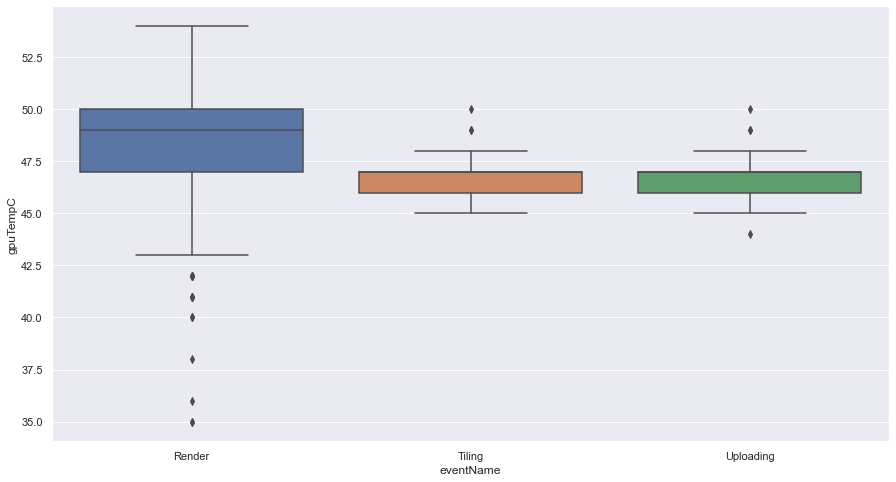

In [238]:
difrnt_event=eventVSgpu[eventVSgpu['eventName']!="TotalRender"]
sns.boxplot(data=difrnt_event[difrnt_event['gpuSerial']==323217056368], x="eventName", y="gpuTempC")

This box plot depicts that higher range of temperature is noted during Render process with higher mean temperature as well. Other 2 events although had lower temperature than render, but both had almost similar temperature distribution.

#### GPU and average time taken for Total Render

In [271]:
toptemp_gpu="select gpuSerial,hostname, eventName,Avg(gpuTempC) as avg_temp from eventVSgpu where eventName not like '%TotalRender%' group by gpuSerial,eventName order by avg_temp;"
toptemp_gpu=pysqldf(toptemp_gpu)
toptemp_gpu

gpuSerial                                hostname  eventName   avg_temp
0   320118119710  4ad946d4435c42dabb5073531ea4f31500000X  Uploading  37.317073
1   320118119710  4ad946d4435c42dabb5073531ea4f31500000X     Tiling  38.482759
2   320118119710  4ad946d4435c42dabb5073531ea4f31500000X     Render  39.552691
3   323617021202  db871cd77a544e13bc791a64a0c8ed5000000U  Uploading  40.256410
4   323217056123  8b6a0eebc87b4cb2b0539e81075191b9000016  Uploading  40.740741
5   325017049041  5903af3699134795af7eafc605ae5fc700000H  Uploading  41.673913
6   323617021202  db871cd77a544e13bc791a64a0c8ed5000000U     Tiling  41.880000
7   323617042624  83ea61ac1ef54f27a3bf7bd0f41ecaa700000D  Uploading  42.256410
8   323617042624  83ea61ac1ef54f27a3bf7bd0f41ecaa700000D     Tiling  42.361111
9   323217056223  04dc4e9647154250beeee51b866b0715000018  Uploading  42.718750
10  325017049041  5903af3699134795af7eafc605ae5fc700000H     Tiling  42.750000
11  323217056123  8b6a0eebc87b4cb2b0539e81075191b9000016     Tiling  42.968750
12  323617021202  db871cd77a544e13bc791a64a0c8ed5000000U     Render  43.117603
13  323217056223  04dc4e9647154250beeee51b866b0715000018     Tiling  43.500000
14  323617042624  83ea61ac1ef54f27a3bf7bd0f41ecaa700000D     Render  43.656489
15  323217056123  8b6a0eebc87b4cb2b0539e81075191b9000016     Render  43.810185
16  325017049041  5903af3699134795af7eafc605ae5fc700000H     Render  43.938683
17  323617042596  a77ef58b13ad4c01b769dac8409af3f800000D  Uploading  44.447368
18  325217086342  0745914f4de046078517041d70b22fe7000007  Uploading  44.452830
19  323217056223  04dc4e9647154250beeee51b866b0715000018     Render  44.810629
20  325217086342  0745914f4de046078517041d70b22fe7000007     Tiling  45.777778
21  323617042596  a77ef58b13ad4c01b769dac8409af3f800000D     Tiling  46.000000
22  325217084671  4c72fae95b9147189a0559269a6953ff000012  Uploading  46.088889
23  323217056368  04dc4e9647154250beeee51b866b0715000011  Uploading  46.781250
24  325217086342  0745914f4de046078517041d70b22fe7000007     Render  46.803982
25  323217056368  04dc4e9647154250beeee51b866b0715000011     Tiling  46.866667
26  325217084671  4c72fae95b9147189a0559269a6953ff000012     Tiling  47.437500
27  323617042596  a77ef58b13ad4c01b769dac8409af3f800000D     Render  47.673897
28  323217056368  04dc4e9647154250beeee51b866b0715000011     Render  48.253618
29  325217084671  4c72fae95b9147189a0559269a6953ff000012     Render  48.685736

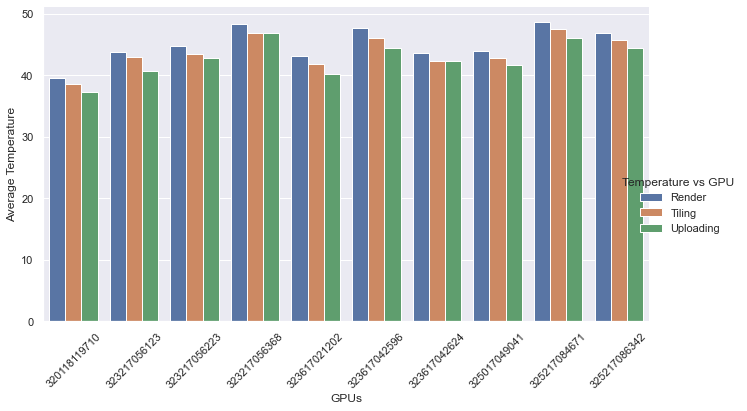

In [269]:

g = sns.catplot(
    data=toptemp_gpu, kind="bar",
    x="gpuSerial", y="avg_temp", hue="eventName",aspect=15/8.27
)
g.set_xticklabels(rotation=45)
g.set_axis_labels("GPUs", "Average Temperature")
g.legend.set_title("Temperature vs GPU ")

From above plot, we can see that highest temperatures were noted during render,then tiling and then uploading. On average, fourth GPU takes most time in completing the tasks, followed by 9th GPU and 6th GPU.

#### average time vs Total Render

In [240]:
gpu_speed_totalrender="select gpuSerial,eventName,AVG(Time_taken) as avg_time  from eventVSgpu where eventName like '%TotalRender%' group by gpuSerial order by avg_time desc;"
gpu_speed_totalrender=pysqldf(gpu_speed_totalrender)
gpu_speed_totalrender

gpuSerial    eventName   avg_time
0  323617021202  TotalRender  47.394788
1  323617042596  TotalRender  46.955827
2  323217056123  TotalRender  46.829567
3  323217056368  TotalRender  46.134329
4  323217056223  TotalRender  45.997412
5  325017049041  TotalRender  45.489765
6  320118119710  TotalRender  45.183658
7  325217084671  TotalRender  42.307426
8  325217086342  TotalRender  41.675820
9  323617042624  TotalRender  41.160521

In [248]:
gpu_speed_totalrender['gpuSerial']=gpu_speed_totalrender['gpuSerial'].astype(str)

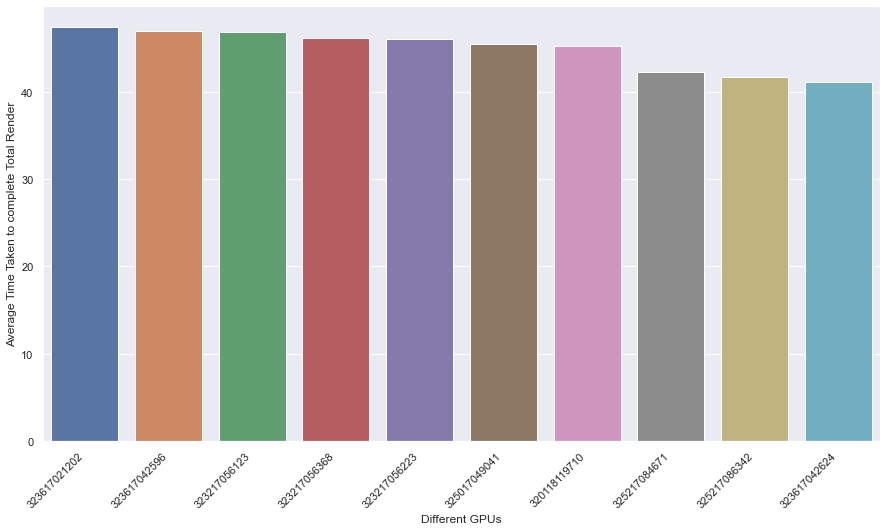

In [249]:
#plt.bar(gpu_speed_totalrender[''],gpu_speed_totalrender['avg_time'],color='hotpink')
sns.barplot(data=gpu_speed_totalrender, x="gpuSerial", y="avg_time")
plt.xlabel("Different GPUs")
plt.ylabel("Average Time Taken to complete Total Render")
plt.xticks(rotation=45, ha='right')
plt.show()

It is interesting to see the order of GPUs taking most time to complete total render. It is quite different from previous bar plot where 3 events were considered. This could be due to the absence of Saving Config time duration which could bridge this gap between the 2 graphs.